In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D , MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2
import os
from sklearn.utils import class_weight
import numpy as np

In [6]:
train_dir=r"D:\brain_tumor_dataset"

In [7]:
train_dir

'D:\\brain_tumor_dataset'

In [8]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

In [9]:
train_data=train_datagen.flow_from_directory(
     train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 203 images belonging to 2 classes.


In [10]:
validation_data=train_datagen.flow_from_directory(
   train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 50 images belonging to 2 classes.


In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [16]:
model=Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])
base_model.trainable=False 

In [17]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 1,048,833 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [19]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data,
    callbacks=[early_stopping]
    
)

Epoch 1/10


C:\Users\proni\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 7s/step - accuracy: 0.5066 - loss: 3.4618 - val_accuracy: 0.4200 - val_loss: 2.2852
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.5615 - loss: 2.2534 - val_accuracy: 0.7800 - val_loss: 1.4986
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.6897 - loss: 1.5032 - val_accuracy: 0.8000 - val_loss: 1.2005
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.6896 - loss: 1.2270 - val_accuracy: 0.7400 - val_loss: 1.0855
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.7745 - loss: 1.1271 - val_accuracy: 0.7200 - val_loss: 1.0125
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.7590 - loss: 1.0380 - val_accuracy: 0.8200 - val_loss: 0.8968
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 7s/step - accuracy: 0.7303 - loss: 0.9308 - val_accuracy: 0.7800 - val_loss: 0.8582
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 78s 7s/step - accuracy: 0.7849 - loss: 0.8652 - val_accuracy: 0.7800 - val_loss: 0.8024
Epoch 9/10
7/7 ━━━━

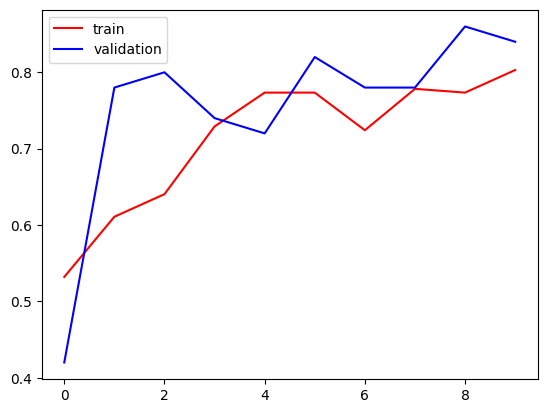

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
val_loss, val_accuracy = model.evaluate(validation_data)
print(f"Final Validation Accuracy: {val_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.8413 - loss: 0.6816
Final Validation Accuracy: 0.8399999737739563


In [24]:
from tensorflow.keras.preprocessing import image
img_path=r"D:\no\12 no.jpg"
img=image.load_img(img_path,target_size=(150,150))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.0
predictions=model.predict(img_array)
if predictions>0.5:
    print("Tumor Detected")
else:
    print("Tumor not detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Tumor not detected


In [25]:
model.save("tumor_model.h5")